# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



## Load the Data

In [37]:
df = pd.read_csv('/Users/ikkk/Desktop/T5 Camp/week 4 - Hassan/1-Weekly Task/Night/Datasets/Traffic_Accidents.csv')
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


* Find the dataset information and observe the datatypes.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

* Check the shape of the data to understand its structure.


In [39]:
df.shape

(52000, 30)

* View the the data with various functions to get an initial sense of the data.

In [40]:
df.dtypes

Unnamed: 0                                       int64
Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                             float64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                    float64
Time                                            object
Local_Authority_(District)                     float64
Local_Authority_(Highway)                       object
1st_Road_Class                                 float64
1st_Road_Number                                float64
Road_Type                                       object
Speed_limi

* Perform summary statistics on the dataset to grasp central tendencies and variability.


In [41]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


* Check for duplicated data.

In [42]:
df.duplicated().sum()

np.int64(0)

* Check for null values.

In [43]:
df.isnull().sum()

Unnamed: 0                                        0
Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                              802
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                     537
Time                                              2
Local_Authority_(District)                        1
Local_Authority_(Highway)                         1
1st_Road_Class                                    1
1st_Road_Number                                   1
Road_Type                                         1
Speed_limit                                    1041
2nd_Road_Cla

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

* Remove the outliers


In [125]:
df.drop(columns=['1st_Road_Number', '2nd_Road_Number'])

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Time_23:50,Time_23:51,Time_23:52,Time_23:53,Time_23:54,Time_23:55,Time_23:56,Time_23:57,Time_23:58,Time_23:59
0,88245,381880.0,298700.0,-0.864777,-0.338961,21,3,2.0,2,1.0,...,False,False,False,False,False,False,False,False,False,False
1,78422,413520.0,284740.0,-0.386649,-0.458936,20,2,1.0,1,7.0,...,False,False,False,False,False,False,False,False,False,False
2,19574,516260.0,177370.0,1.125710,-1.394071,1,3,2.0,2,7.0,...,False,False,False,False,False,False,False,False,False,False
3,79337,401530.0,282610.0,-0.567549,-0.477106,20,3,2.0,1,5.0,...,False,False,False,False,False,False,False,False,False,False
4,89121,421760.0,320680.0,-0.259920,-0.149979,21,3,1.0,1,3.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,58660,427910.0,515740.0,-0.148541,1.527636,11,3,2.0,1,5.0,...,False,False,False,False,False,False,False,False,False,False
51996,101443,450720.0,340010.0,0.183269,0.014452,31,3,1.0,1,4.0,...,False,False,False,False,False,False,False,False,False,False
51997,437,526580.0,177540.0,1.278043,-1.394727,1,3,1.0,1,2.0,...,False,False,False,False,False,False,False,False,False,False
51998,61353,426800.0,463700.0,-0.170892,1.080098,12,3,2.0,2,1.0,...,False,False,False,False,False,False,False,False,False,False


* Impute missing data


In [123]:
# i descide to fillna missing data cause will not effect on the goal

df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mode()[0], inplace=True)
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace=True)
df['Speed_limit'].fillna(df['Speed_limit'].mode()[0], inplace=True)
df['Pedestrian_Crossing-Physical_Facilities'].fillna(df['Pedestrian_Crossing-Physical_Facilities'].mode()[0], inplace=True)
df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'].mode()[0], inplace=True)

/var/folders/yj/c5h4fglj5kdgcnv5jpkvcq400000gn/T/ipykernel_55759/1074668534.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mode()[0], inplace=True)
/var/folders/yj/c5h4fglj5kdgcnv5jpkvcq400000gn/T/ipykernel_55759/1074668534.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51174 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   51174 non-null  int64  
 1   Accident_Index                               51174 non-null  object 
 2   Location_Easting_OSGR                        51174 non-null  float64
 3   Location_Northing_OSGR                       51174 non-null  float64
 4   Longitude                                    51174 non-null  float64
 5   Latitude                                     51174 non-null  float64
 6   Police_Force                                 51174 non-null  int64  
 7   Accident_Severity                            51174 non-null  int64  
 8   Number_of_Vehicles                           51174 non-null  float64
 9   Number_of_Casualties                         51174 non-null  int64  
 10  Dat

* Scale the data


In [62]:
df['Longitude'] = scale(df['Longitude'])
df['Latitude'] = scale(df['Latitude'])



* Reduce dimentions using PCA


In [120]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[['Longitude', 'Latitude']])

pca.components_

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

* Implement One-Hot Encoding for nominal categorical variables.

In [128]:
df = pd.get_dummies(df, columns=['Accident_Index','Local_Authority_(Highway)'])


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [137]:
selected_features = ['Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Urban_or_Rural_Area']

data_encoded = pd.get_dummies(df[selected_features])
imputer = SimpleImputer(strategy='most_frequent')

data_imputed = imputer.fit_transform(data_encoded)
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_imputed)

pca = PCA(n_components=0.9)
pca_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_data)
silhouette_avg = silhouette_score(pca_data, clusters)

silhouette_avg


np.float64(0.2870200831882908)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

/var/folders/yj/c5h4fglj5kdgcnv5jpkvcq400000gn/T/ipykernel_55759/463673632.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center', prop={'size':8},


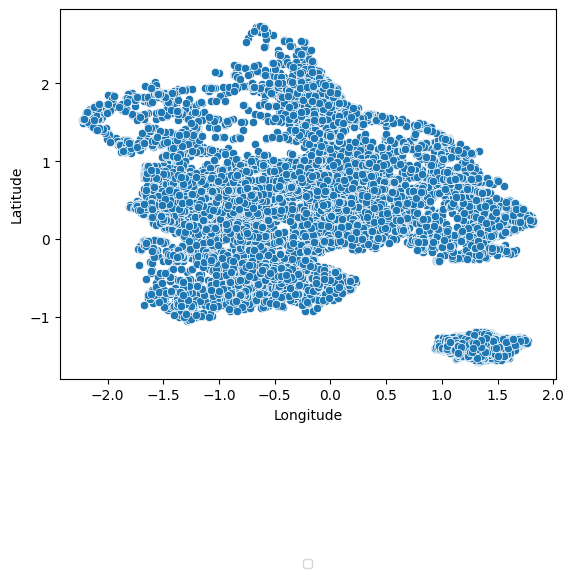

In [119]:

sns.scatterplot(data=df, x='Longitude', y='Latitude')
plt.legend(loc='center', prop={'size':8}, 
           bbox_to_anchor=(0.5, -0.5), ncol=10)

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [122]:
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

wcss

[1177823.1656710936,
 1108751.3713003076,
 970442.9234225396,
 918495.1698069616,
 867096.5163898256,
 797507.9377314878,
 735032.27003852,
 698842.0125761621,
 647843.1813892567,
 598799.3885404104]

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [103]:
silhouette_avg = silhouette_score(pca_data, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Cluster Centers:\n{kmeans.cluster_centers_}')


Silhouette Score: 0.2870200831882908
Cluster Centers:
[[ 1.15079179e+00 -1.52790523e-01  6.35542993e-01  3.74883019e-02
  -9.71119535e-03  9.56165451e-02 -1.52961477e-02  5.73701383e-02
  -4.51584590e-02 -4.44058371e-02  4.19711332e-03  2.75052164e-04
   1.57700076e-02 -1.09840160e-01 -5.63334474e-02  1.81477926e-02
   2.35960182e-01  8.26524641e-02]
 [-2.13007953e-02  2.40306038e+00 -6.74221921e-01 -7.59572484e-02
  -6.00252471e-02 -2.59035304e-01 -1.84430377e-01 -1.56275892e-01
  -1.78194124e-01  1.76801647e-01  7.45193298e-02 -2.60788236e-01
  -1.14962387e-03  2.00531334e-01  1.23062749e-02 -2.10610631e-01
  -4.32576517e-01 -5.93698603e-02]
 [-2.98477399e-02 -1.57226206e+00 -1.90911419e+00  7.73086083e-02
  -1.62839104e-01 -4.04373259e-01  7.21196207e-02 -7.50234002e-02
  -1.24608817e-01  1.32281705e-01 -1.24850975e-01 -1.15449528e-02
  -1.34268226e-01  1.50733957e-01  6.72555158e-02 -1.01357274e-01
  -3.41874749e-01 -5.91633536e-02]
 [-3.58840693e+00 -4.17679954e-01  9.99978923e-01

## Plot the data points with their predicted cluster center

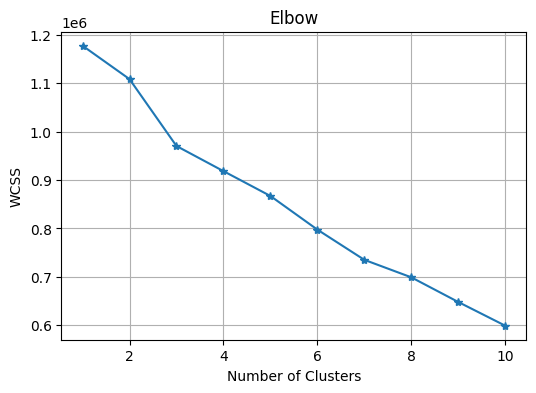

In [117]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='*')
plt.title('Elbow')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?<br>

 Answer:
Because they are related to the conditions of traffic accidents.
<br>


* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   <br>**Answer: Elbow.**

   
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   <br>**Answer:Silhouette Score, It measures how similar each point compared to other clusters.**
   <br>
   
   - How do these metrics help in understanding the effectiveness of your clustering approach?
   <br>**Answer:By visualizing.**
   
   
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?
